In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
%matplotlib inline
DISPLAY_MAX_ROWS = 20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
np.set_printoptions(suppress=True)

### Import wine sample dataset from UCI database

In [2]:
# from UCI database
# one row = one wine sample
# first row is cultivar of wine sample (1, 2, or 3)
# remaining rows are concentrations of the 13 different chemicals in that sample
# no header in csv file
wine_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# examine the data/types
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Label independent variable and dependent variable (X, y)  (chemicals in wine sample, cultivar)

In [4]:
# relabel the columns
wine_data.columns = ["V"+str(i) for i in range(1, len(wine_data.columns) + 1)]
# set the first column to string datatype
wine_data.V1 = wine_data.V1.astype(str)
# assign independent variable data, all columns V2 and greater
X = wine_data.loc[:, "V2":]
# assign the dependent variable data, just the V1 column
y = wine_data.V1

In [5]:
# example dataframe cleaned 
wine_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# idea of the number samples for each cultivar
wine_data["V1"].value_counts()

2    71
1    59
3    48
Name: V1, dtype: int64

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
V1     178 non-null object
V2     178 non-null float64
V3     178 non-null float64
V4     178 non-null float64
V5     178 non-null float64
V6     178 non-null int64
V7     178 non-null float64
V8     178 non-null float64
V9     178 non-null float64
V10    178 non-null float64
V11    178 non-null float64
V12    178 non-null float64
V13    178 non-null float64
V14    178 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB


In [8]:
X

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: V1, Length: 178, dtype: object

### Pair plots/ Scatter matrix of all pairwise comparisons chemical to chemical

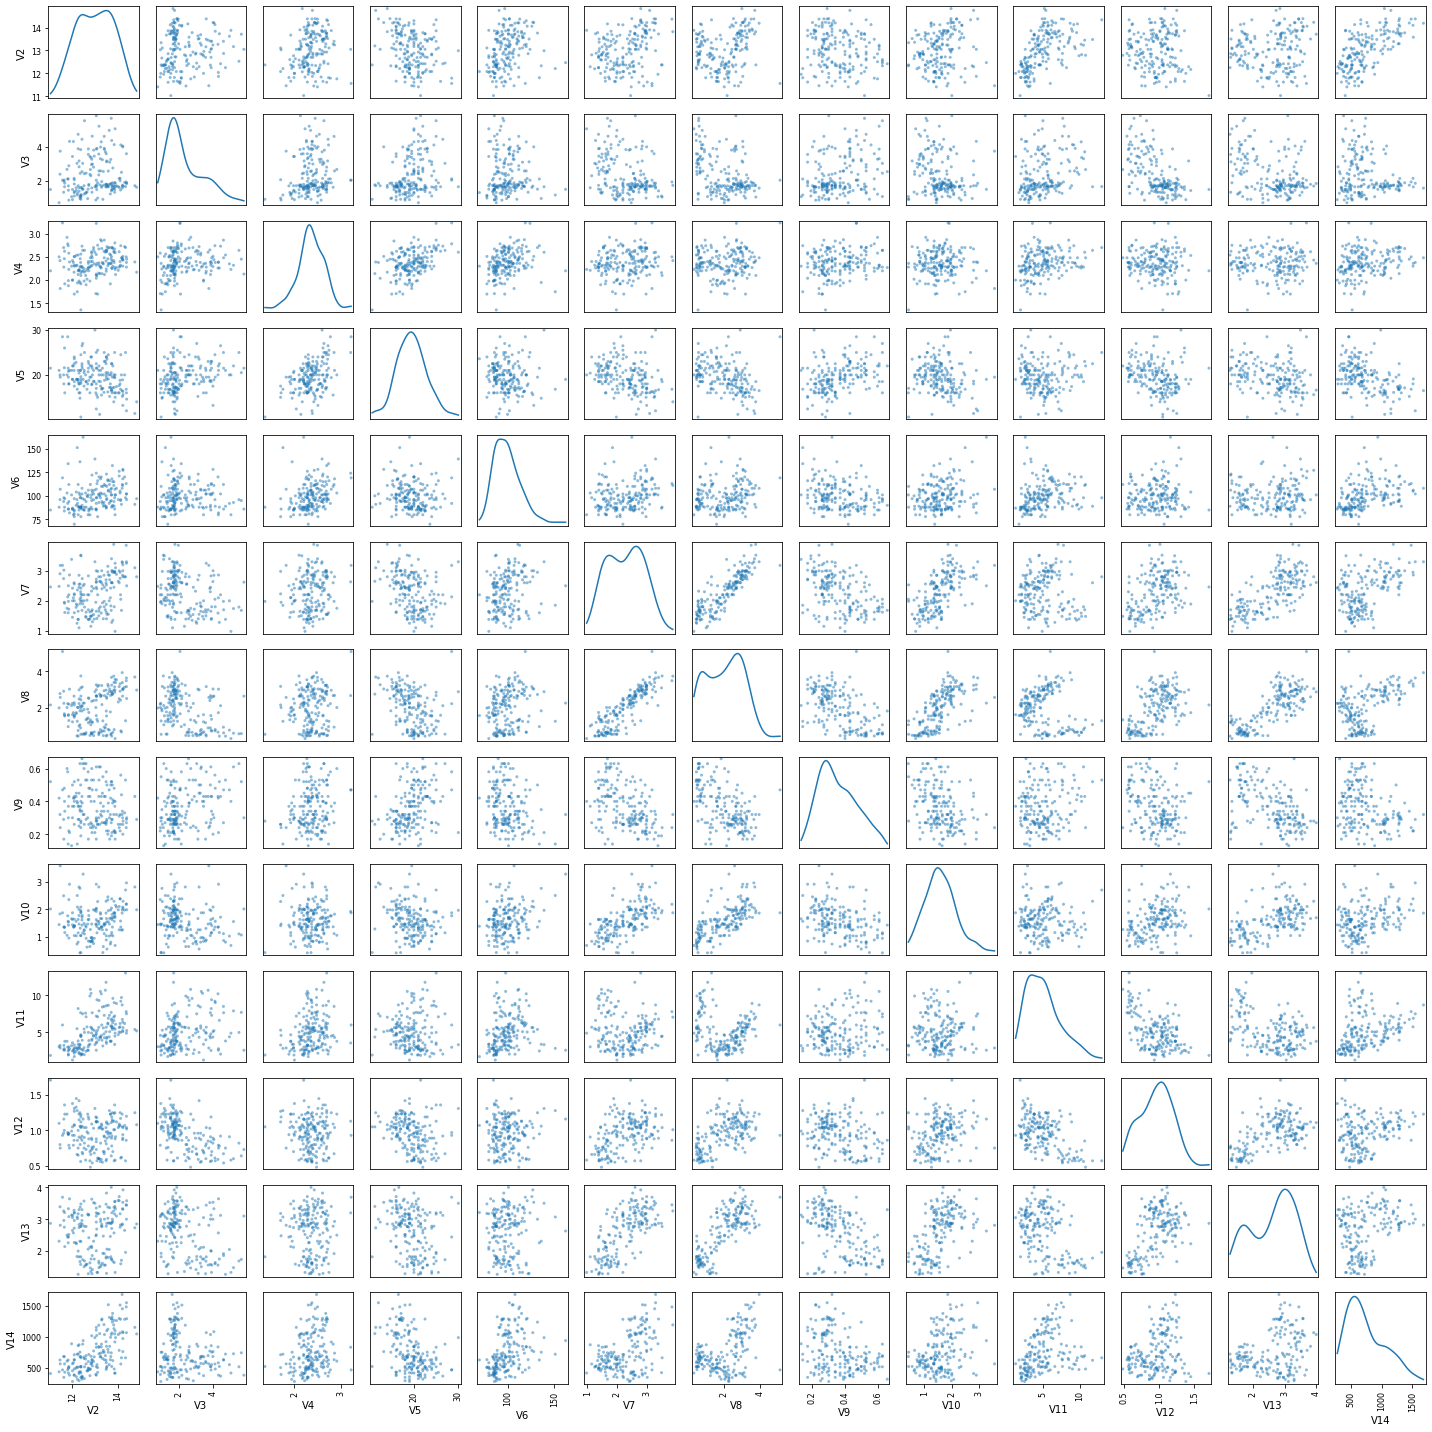

In [10]:
# plot a matrix scatter plot - paired plots with kernel density estimatation "kde"
pd.plotting.scatter_matrix(wine_data.loc[:, "V2": "V14"], diagonal='kde', figsize=(20,20))
plt.tight_layout()
plt.show()

### More closely examine selected pair plots that look correlated

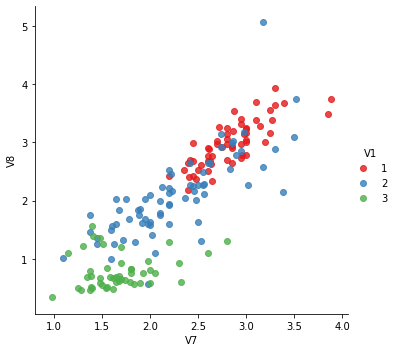

In [11]:
# pick a pair to examine in more detail #V7 and V8 look correlated; color by V1 cultivar
sns.lmplot("V7", "V8", wine_data, hue="V1", fit_reg=False, palette="Set1")

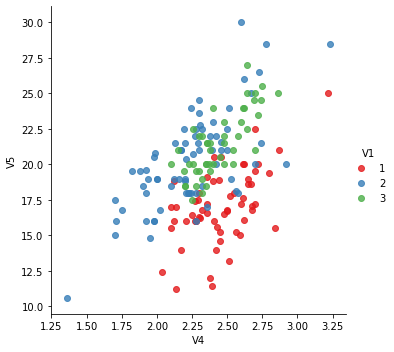

In [12]:
# pick a pair to examine in more detail #V4 and V5 look correlated, color by V1 cultivar
sns.lmplot("V4", "V5", wine_data, hue="V1", fit_reg=False, palette="Set1")

### Use profile plots to examine the variance in the datasets

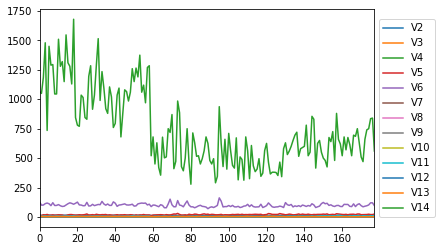

In [13]:
# plot a profile plot; examine variance within; plot all rows (x) and values (y) 
ax = wine_data.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

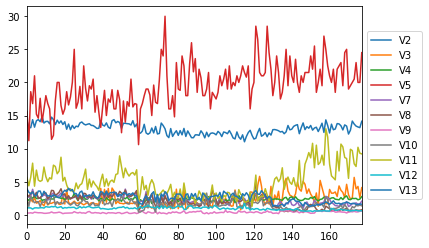

In [14]:
# remove V14 and V6 values (much larger values than the other groups) to examine all other groups
# note V5 and V2 larger
ax = wine_data[["V2","V3","V4","V5","V7","V8","V9","V10","V11","V12","V13"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Get summary stats for each variable

In [15]:
# get summary stats for X
X.describe()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
# alternative way to get the mean
# need to standardize; mean set to zero
X.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

In [17]:
# alternative way to get the std
# need to standardize large differences in variance; set variance to one 
X.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

In [18]:
# find mean of cultivar 1 for each chemical
cultivar_2 = wine_data[y=="1"]
cultivar_2.loc[:, "V2":].apply(np.mean)

V2       13.744746
V3        2.010678
V4        2.455593
V5       17.037288
V6      106.338983
V7        2.840169
V8        2.982373
V9        0.290000
V10       1.899322
V11       5.528305
V12       1.062034
V13       3.157797
V14    1115.711864
dtype: float64

In [19]:
# find std of cultivar 1 for each chemical
cultivar_2 = wine_data[y=="1"]
cultivar_2.loc[:, "V2":].apply(np.std)

V2       0.458192
V3       0.682689
V4       0.225233
V5       2.524651
V6      10.409595
V7       0.336077
V8       0.394111
V9       0.069453
V10      0.408602
V11      1.228032
V12      0.115491
V13      0.354038
V14    219.635449
dtype: float64

### Calculate the mean, sd, and sample size for each cultivar (1,2,3)

In [20]:
# function to print means and SD for each cultivar
def printMeanSDbyCultivar(var, cultivar):
    data_groupby = var.groupby(cultivar)
    print("Means: ")
    display(data_groupby.apply(np.mean))
    print("SDs: ")
    display(data_groupby.apply(np.std))
    print("Sample Size: ")
    display(data_groupby.apply(len))

In [21]:
printMeanSDbyCultivar(X, y)

Means: 


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


SDs: 


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805


Sample Size: 


V1
1    59
2    71
3    48
dtype: int64

### Function to calculate the within-group variance

In [22]:
# a function to calculate within-group variance
def calcWithinGroupVar(var, cultivar):
    levels = sorted(set(cultivar))
    numlevels = len(levels)
    numtotal = 0
    denomtotal = 0
    for level in levels:
        leveldata = var[cultivar==level]
        levellength = len(leveldata)
        # standard deviation for group
        sd = np.std(leveldata)
        num = (levellength) * sd **2
        denom = levellength
        numtotal= numtotal + num
        denomtotal = denomtotal + denom
    # calculate the within-group variance    
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

In [23]:
# calculate the within group variance for all variables 
calcWithinGroupVar(X, y)

V2         0.262052
V3         0.887547
V4         0.066072
V5         8.006811
V6       180.657773
V7         0.191270
V8         0.274708
V9         0.011912
V10        0.246173
V11        2.284923
V12        0.024488
V13        0.160779
V14    29707.681871
dtype: float64

### Function to calculate the between-groups variance

In [24]:
# function to calculate the between-groups variance 
def calcBetweenGroupVar(var, cultivar):
    levels = sorted(set((cultivar)))
    numlevels = len(levels)
    grandmean = np.mean(var)
    numtotal = 0
    denomtotal = 0
    for level in levels:
        leveldata = var[cultivar==level]
        levellength = len(leveldata)
        # get mean and sd for group
        mean = np.mean(leveldata)
        sd = np.std(leveldata)
        num = levellength * ((mean - grandmean) ** 2)
        denom = levellength
        numtotal = numtotal + num
        denomtotal = denomtotal + denom
    # calculate the between-groups variance    
    Vb = numtotal / (numlevels - 1)
    return (Vb)

In [25]:
# calculate the between groups variance for all groups
# avoid scientific notation print out
pd.set_option('display.float_format', lambda x: '%.4f' % x)
calcBetweenGroupVar(X, y)

V2         35.3974
V3         32.7890
V4          0.8796
V5        286.4167
V6       2245.5010
V7         17.9284
V8         64.2612
V9          0.3285
V10         7.4520
V11       275.7080
V12         2.4810
V13        30.5435
V14   6176832.3223
dtype: float64

### Calculate the Seperation (between group variance / within group variance)

In [26]:
# calculate the seperation:  the between groups variance / within groups variance
seperation = calcBetweenGroupVar(X, y) / calcWithinGroupVar(X, y)
seperation

V2    135.0776
V3     36.9434
V4     13.3129
V5     35.7716
V6     12.4296
V7     93.7330
V8    233.9259
V9     27.5754
V10    30.2714
V11   120.6640
V12   101.3168
V13   189.9723
V14   207.9204
dtype: float64

In [74]:
def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable 
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupVar(variablei, groupvariable)
        Vb = calcBetweenGroupVar(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [75]:
calcSeparations(X, y)

variable V2 Vw= 0.2620524691539065 Vb= 35.397424960269106 separation= 135.07762424279917
variable V3 Vw= 0.8875467967465813 Vb= 32.789018486921364 separation= 36.94342496318368
variable V4 Vw= 0.0660721013425184 Vb= 0.8796113572487572 separation= 13.312901199991257
variable V5 Vw= 8.006811181211566 Vb= 286.41674636308926 separation= 35.77163740730921
variable V6 Vw= 180.65777316441023 Vb= 2245.50102788939 separation= 12.429584338149898
variable V7 Vw= 0.1912704752242267 Vb= 17.92835729428464 separation= 93.73300962036717
variable V8 Vw= 0.274707514337437 Vb= 64.26119502356416 separation= 233.92587268154927
variable V9 Vw= 0.011911702213279677 Vb= 0.32847015746162356 separation= 27.575417146965858
variable V10 Vw= 0.2461729437955417 Vb= 7.451995507777756 separation= 30.27138317022764
variable V11 Vw= 2.2849230813335426 Vb= 275.7080008223043 separation= 120.66401844100315
variable V12 Vw= 0.024487646943241362 Vb= 2.4810099149382907 separation= 101.31679539030002
variable V13 Vw= 0.160778

### Purpose of Linear Discriminant Analysis (LDA) is to find the combination of individual variables that will give greatest seperation between groups (cultivars)
Largest seperation V8 = 233.9259

### Calculate the within-groups covariance for two variables

In [27]:
# function for withinGroupsCovariance
def calcWithinGroupCoVar(var1, var2, cultivar):
    levels = sorted(set(cultivar))
    numlevels = len(levels)
    Covw = 0.0
    # the covariance for variable 1 and variable 2 for each group
    for level in levels:
        leveldata1 = var1[cultivar==level]
        leveldata2 = var2[cultivar==level]
        mean1 = np.mean(leveldata1)
        mean2 = np.mean(leveldata2)
        levellength = len(leveldata1)
        term1 = 0.0
        for leveldata1j, leveldata2j in zip(leveldata1, leveldata2):
            term1 += (leveldata1j - mean1) * (leveldata2j - mean2)
        Cov_group = term1
        Covw += Cov_group
    totallength = len(var1)
    Covw /= totallength - numlevels
    return Covw

In [28]:
# calculate the covariance between V8 and V11
calcWithinGroupCoVar(X.V8, X.V11, y)

0.28667830215140183

##### Positive within-group covariance between V8 and V11  means that individuals with a high V8 tend to have a high V11 and vice versa

### Calculate the between-groups covariance for two variables

In [29]:
# function for between-groups covariance
def calcBetweenGroupCoVar(var1, var2, cultivar):
    levels = sorted(set(cultivar))
    numlevels = len(levels)
    #calc grand means
    var1mean = np.mean(var1)
    var2mean = np.mean(var2)
    # calculate the between groups covariance
    Covb = 0.0
    for level in levels:
        leveldata1 = var1[cultivar==level]
        leveldata2 = var2[cultivar==level]
        mean1 = np.mean(leveldata1)
        mean2 = np.mean(leveldata2)
        levellength = len(leveldata1)
        term1 = (mean1 - var1mean) * (mean2 - var2mean) * levellength
        Covb += term1
    Covb /= numlevels - 1
    return Covb    

In [30]:
calcBetweenGroupCoVar(X.V8, X.V11, y)

-60.4107748359163

##### Negative between groups covariance between V8 and V11 means that groups with high V8 mean value tend to have a low mean V11 value and vice versa

### Calculating pearson correlation coefficient for all pairs of variables
investigate if any variables in a multivariate data set are significantly correlated

In [31]:
# example PPC for V2 versus V3
pcc = stats.pearsonr(X.V2, X.V3)
print("PCC: ", pcc[0])
print("p-value: ", pcc[1])

PCC:  0.09439694091041398
p-value:  0.21008198597072283


In [32]:
ppcAll = X.corr()
ppcAll

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V2,1.0000,0.0944,0.2115,-0.3102,0.2708,0.2891,0.2368,-0.1559,0.1367,0.5464,-0.0717,0.0723,0.6437
V3,0.0944,1.0000,0.1640,0.2885,-0.0546,-0.3352,-0.4110,0.2930,-0.2207,0.2490,-0.5613,-0.3687,-0.1920
V4,0.2115,0.1640,1.0000,0.4434,0.2866,0.1290,0.1151,0.1862,0.0097,0.2589,-0.0747,0.0039,0.2236
V5,-0.3102,0.2885,0.4434,1.0000,-0.0833,-0.3211,-0.3514,0.3619,-0.1973,0.0187,-0.2740,-0.2768,-0.4406
V6,0.2708,-0.0546,0.2866,-0.0833,1.0000,0.2144,0.1958,-0.2563,0.2364,0.2000,0.0554,0.0660,0.3934
V7,0.2891,-0.3352,0.1290,-0.3211,0.2144,1.0000,0.8646,-0.4499,0.6124,-0.0551,0.4337,0.6999,0.4981
V8,0.2368,-0.4110,0.1151,-0.3514,0.1958,0.8646,1.0000,-0.5379,0.6527,-0.1724,0.5435,0.7872,0.4942
V9,-0.1559,0.2930,0.1862,0.3619,-0.2563,-0.4499,-0.5379,1.0000,-0.3658,0.1391,-0.2626,-0.5033,-0.3114
V10,0.1367,-0.2207,0.0097,-0.1973,0.2364,0.6124,0.6527,-0.3658,1.0000,-0.0252,0.2955,0.5191,0.3304
V11,0.5464,0.2490,0.2589,0.0187,0.2000,-0.0551,-0.1724,0.1391,-0.0252,1.0000,-0.5218,-0.4288,0.3161


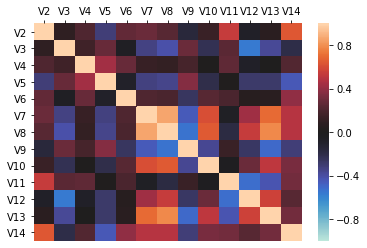

In [33]:
# correlation matrix plot heatmap
sns.heatmap(ppcAll, vmax=1., vmin=-1., square= False, center=0, xticklabels="auto", yticklabels="auto").xaxis.tick_top()

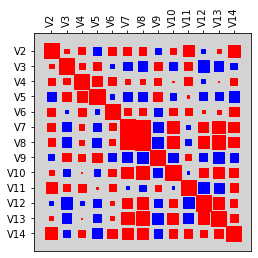

In [34]:
# alternative plot Hinton diagram (red=positive; blue=negative; size of box determines magnitude)
def hinton(matrix, max_weight=None, ax=None):
    ax = ax if ax is not None else plt.gca()
    
    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max()) / np.log(2))
        
    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    for (x,y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size, facecolor=color, edgecolor=color)
        ax.add_patch(rect)
        
    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    
    ax.autoscale_view()
    ax.invert_yaxis()
    
hinton(ppcAll)

In [35]:
# function to order the most highly correlated pairs (pos or neg) in descending order
def mosthighlycorrelated(dataframe, numtoreport):
    # find correlations
    cormatrix = dataframe.corr()
    # set the diagonal to zero, don't need correlations to same value 1.0
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign column headers
    cormatrix.columns = ["Variable_1", "Variable_2", "Correlation Coeff" ]
    return cormatrix.head(numtoreport)

In [36]:
# top 10 correlation coeff
mosthighlycorrelated(X, 10)

,Variable_1,Variable_2,Correlation Coeff
0,V7,V8,0.8646
1,V8,V13,0.7872
2,V7,V13,0.6999
3,V8,V10,0.6527
4,V2,V14,0.6437
5,V7,V10,0.6124
6,V12,V13,0.5655
7,V3,V12,-0.5613
8,V2,V11,0.5464
9,V8,V12,0.5435


### Standardize Variables 
To compare variable with different units or differing variances it is a good idea to standardize variables. 
SD ranged from 0.124 (V9) to 314.021 (V14). 
If not standardized and used for PCA the first principal component would be dominated by the variables which show largest variances like V14.

In [37]:
# SD fold diff
314.021/0.124

2532.427419354839

In [38]:
# original
X.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065
1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050
2,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185
3,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480
4,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735


In [39]:
#standardize so have a mean of 0 and variance of 1; then find principal components without being overly biased to variables with the most variance
standardizedX = scale(X)
standardizedX = pd.DataFrame(standardizedX, index=X.index, columns=X.columns)

In [40]:
# check that mean is at zero
standardizedX.mean()

V2    -0.0000
V3    -0.0000
V4    -0.0000
V5    -0.0000
V6    -0.0000
V7    -0.0000
V8    -0.0000
V9     0.0000
V10   -0.0000
V11   -0.0000
V12    0.0000
V13    0.0000
V14   -0.0000
dtype: float64

In [41]:
# std is at one
standardizedX.std()

V2    1.0028
V3    1.0028
V4    1.0028
V5    1.0028
V6    1.0028
V7    1.0028
V8    1.0028
V9    1.0028
V10   1.0028
V11   1.0028
V12   1.0028
V13   1.0028
V14   1.0028
dtype: float64

### Principal Component Analysis (PCA) 
find the best low-dimensional representation of the variation in a multivariate dataset. Carry out PCA to investigate whether we can capture most of the variation between samples using a smaller number of new variables (principal components). New variables is a linear combination of all or some of the 13 chemical concentrations

In [42]:
pca = PCA().fit(standardizedX)

In [43]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
# function to get PCA summary
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [45]:
summary = pca_summary(pca, standardizedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.1693,0.3620,0.3620
PC2,1.5802,0.1921,0.5541
PC3,1.2025,0.1112,0.6653
PC4,0.9586,0.0707,0.7360
PC5,0.9237,0.0656,0.8016
PC6,0.8010,0.0494,0.8510
PC7,0.7423,0.0424,0.8934
PC8,0.5903,0.0268,0.9202
PC9,0.5375,0.0222,0.9424


In [46]:
summary.sdev

,Standard deviation
PC1,2.1693
PC2,1.5802
PC3,1.2025
PC4,0.9586
PC5,0.9237
PC6,0.8010
PC7,0.7423
PC8,0.5903
PC9,0.5375
PC10,0.5009


In [47]:
# sum of 13 column variables with 1 sd (after standardization) = 13
np.sum(summary.sdev**2)

Standard deviation   13.0000
dtype: float64

### Determine how many principal components to retain
Make a scree plot

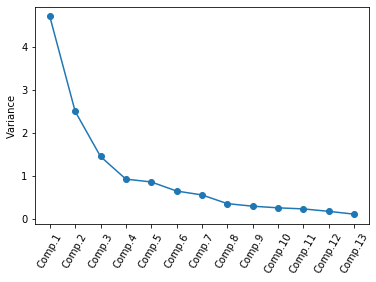

In [48]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2 
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60) 
    plt.ylabel("Variance")
    plt.show()
screeplot(pca, standardizedX)

##### Greatest change in slope occurs at component 4 in the scree plot ("the elbow of the plot") so only the first three components should be retained.  Using Kaiser's criterion = only retain PC where variance > 1 (first 3).  Or keep the number of components required to explain at least some minimum amount of the variance (80%) (need first 5)

In [49]:
# first component is the linear combination of the variables below
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

##### The results of the first principal component is the linear combination of the standardized 13 variables (V2, V3, ...) .  It represents a contrast between the concentrations of V3, V4, V5, V9 and V11 (all neg) versus V2, V6, V7, V8, V10, V12, V13 (all pos).  The largest components have the largest weight so V3,V5,V9 vs. V7,V8,V10,V11,V12

In [50]:
# note the square of the loadings sum to 1
np.sum(pca.components_[0]**2)

0.9999999999999996

In [51]:
# function to calculate the principal component
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables 
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j] 
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei 
    return pc

In [52]:
calcpc(standardizedX, pca.components_[0])

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

In [53]:
# compare to the ones we calculated and they agree
pca.transform(standardizedX)[:, 0]

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

In [54]:
# calculate the 2nd principal components
pca.components_[1]

array([-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
       -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
        0.27923515,  0.16449619, -0.36490283])

In [55]:
# square of the loadings should sum to one (mean of zero and variance of one)
np.sum(pca.components_[1]**2)

1.0000000000000013

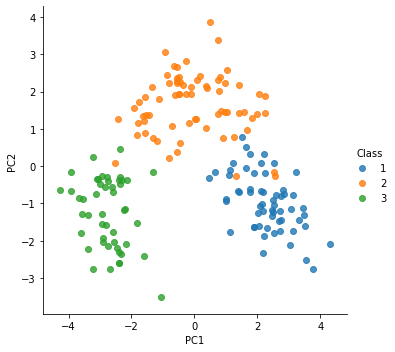

In [56]:
def pca_scatter(pca, standardised_values, classifs):
    # pca_values computed by transform() method of PCA class return matrix
    pca_values = pca.transform(standardised_values)
    # matrix to dataframe with first column in matrix is first principal component pca_values[:, 0]
    pca_df = pd.DataFrame(zip(pca_values[:, 0], pca_values[:, 1], classifs), columns=["PC1", "PC2", "Class"]) 
    # plot PCA 1 vs PCA 2, color by cultivar
    sns.lmplot("PC1", "PC2", pca_df, hue="Class", fit_reg=False)

pca_scatter(pca, standardizedX, y)

##### The first principal component (x-axis)  seperates the wine samples from cultivar 1 and cultivar 3.   The second principal component seperates samples of cultivar 2 from cultivars 1 and 3.  The first two principal components are reasonably useful in distinguishing wine samples of three different cultivars

In [57]:
# show means and sd again for standardized data to see how the PCAs 1 vs. 3 and 2 vs. 1/3 can seperate/cluster well
printMeanSDbyCultivar(standardizedX, y)

Means: 


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.9192,-0.2923,0.3256,-0.7380,0.4632,0.8734,0.9569,-0.5790,0.5404,0.2034,0.4588,0.7714,1.1745
2,-0.8917,-0.3624,-0.4450,0.2231,-0.3646,-0.0581,0.0518,0.0146,0.0690,-0.8528,0.4336,0.2453,-0.7241
3,0.1892,0.8953,0.2579,0.5771,-0.0301,-0.9876,-1.2528,0.6901,-0.7663,1.0114,-1.2054,-1.3109,-0.3726


SDs: 


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.5660,0.6128,0.8233,0.7581,0.7309,0.5385,0.3957,0.5596,0.7159,0.5312,0.5067,0.5001,0.6994
2,0.6598,0.9052,1.1450,0.9988,1.1680,0.8677,0.7035,0.9918,1.0474,0.3973,0.8841,0.6964,0.4971
3,0.6481,0.9663,0.6680,0.6710,0.7566,0.5660,0.2916,0.9898,0.7088,0.9892,0.4968,0.3803,0.3627


Sample Size: 


V1
1    59
2    71
3    48
dtype: int64

### Linear Discriminant Analysis (LDA or canonical discriminant analysis, discriminant analysis)
##### Purpose to find the linear combinations of the original variables (13 wine chemicals) that gives the best possible seperation between groups (cultivars)
G = 3 (cultivars) and p= 13 (chemicals).  Max number of discriminant functions that can seperate the wines by cultivar is the minimum of G -1 or p;  so G - 1 = 2;  so 2 useful discriminant functions

In [58]:
# to compute linear discriminant analysis use fit() from sklearn.discriminant_analysis
lda = LinearDiscriminantAnalysis().fit(X, y)

In [59]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret) 
    return ret

In [60]:
# first first discriminant function is a linear combination of the variables in the first column. scaled so mean is zero. 
# loadings calculated so the within group variance of each discriminant function for each group in equal to 1
pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1,LD2
V2,-0.4034,0.8718
V3,0.1653,0.3054
V4,-0.3691,2.3458
V5,0.1548,-0.1464
V6,-0.0022,-0.0005
V7,0.6181,-0.0322
V8,-1.6612,-0.4920
V9,-1.4958,-1.6310
V10,0.1341,-0.3071
V11,0.3551,0.2532


In [61]:
lda.scalings_[:, 0]

array([-0.40339978,  0.1652546 , -0.36907526,  0.15479789, -0.0021635 ,
        0.61805207, -1.66119123, -1.49581844,  0.13409263,  0.35505571,
       -0.81803607, -1.15755938, -0.00269121])

In [62]:
pretty_scalings_.LD1

V2    -0.4034
V3     0.1653
V4    -0.3691
V5     0.1548
V6    -0.0022
V7     0.6181
V8    -1.6612
V9    -1.4958
V10    0.1341
V11    0.3551
V12   -0.8180
V13   -1.1576
V14   -0.0027
Name: LD1, dtype: float64

In [63]:
# function to calculate the values of 1st discriminant function
def calclda(variables, loadings):
    # find the number of samples in the data set and the number of variables 
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j] 
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
            ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0: 
    ld = scale(ld, with_std=False)
    return ld

In [64]:
# calculate the values of the first discriminant function for each sample
calclda(X, lda.scalings_[:, 0])

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [65]:
# compare to previous using tranform to get values of first linear discriminant function
lda.fit_transform(X, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

##### While it is not necessary to standardize data for linear discriminant analysis, standardization makes it easier to interpret the loadings for a LD function

In [66]:
# standardization function: subtract the mean from each variable and dividing by the within-group SD
def groupStandardise(variables, groupvariable):
    # find the number of samples in the data set and the number of variables 
    numsamples, numvariables = variables.shape
    # find the variable names
    variablenames = variables.columns
    # calculate the group-standardised version of each variable 
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]
        variablei_Vw = calcWithinGroupVar(variablei, groupvariable) # calcWithinGroupVar(var, cultivar)
        variablei_mean = np.mean(variablei)
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw)) 
        variables_new[variable_name] = variablei_new
    return variables_new

In [67]:
groupstandardisedX = groupStandardise(X, y)

In [68]:
# lda on group-standardized variables
lda2 = LinearDiscriminantAnalysis().fit(groupstandardisedX, y) 
pretty_scalings(lda2, groupstandardisedX)

,LD1,LD2
V2,-0.2065,0.4463
V3,0.1557,0.2877
V4,-0.0949,0.6030
V5,0.4380,-0.4142
V6,-0.0291,-0.0062
V7,0.2703,-0.0141
V8,-0.8707,-0.2579
V9,-0.1633,-0.1780
V10,0.0665,-0.1524
V11,0.5367,0.3828


In [69]:
lda.fit_transform(X, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [70]:
lda2.fit_transform(groupstandardisedX, y)[:, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551,  1.58618749,
        0.79967216,  2.38015446, -0.45917726, -0.50726885,  0.39398359,
       -0.92256616, -1.95549377, -0.34732815,  0.20371212, -0.24

In [72]:
# calculate seperation achieved by each discriminant function
# calculate the value of each discriminant function by 
# sub the values of the variables into the linear combination for the discriminant function and then scale
def rpredict(lda, X, y, out=False): 
    ret = {"class": lda.predict(X),"posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)} 
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class") 
        print(ret["class"]) 
        print() 
        print("posterior") 
        print(ret["posterior"]) 
        print()
        print("x")
        print(ret["x"]) 
    return ret
lda_values = rpredict(lda, standardizedX, y, True)

class
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '3' '3' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '3' '2' '3' '3' '3' '3' '3' '3' '3' '2' '2' '2' '3' '2' '3' '3' '2' '2'
 '2' '2' '3' '2' '3' '3' '3' '3' '2' '2' '3' '3' '3' '3' '2' '3']

posterior
         1      2      3
0   0.0000 1.0000 0.0000
1   0.0000 1.0000 0.0000
2   0.0000 1.0000 0.0000
3   0.0000 1.0000 0.0000
4   0.0000 1.0000 0.0000
..     ...    ...    ...
173 0.0000 0.4287 0.5713
174 0.0000 0.0170 0.9830
175 0.0000 0.0033 0.9967
176 0.0000

In [76]:
# calc seperation (between groups var / within groups var)
calcSeparations(lda_values["x"], y)

variable LD1 Vw= 1.0 Vb= 794.6522005662158 separation= 794.6522005662158
variable LD2 Vw= 0.999999999999999 Vb= 361.24104149345425 separation= 361.2410414934546


In [79]:
# sum of LD1 + LD2 = 1155.89
# percent sep LD1 = 794/1155 = 0.68  or 68%
# percent sep LD2 = 361/1155 = 0.31  or 31%
def proportion_of_trace(lda):
    ret = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    ret.index = ["LD"+str(i+1) for i in range(ret.shape[0])]
    ret = ret.transpose()
    print("Proportion of trace:")
    print(ret.to_string(index=False))
    return ret

proportion_of_trace(LinearDiscriminantAnalysis(solver="eigen").fit(X, y));

Proportion of trace:
   LD1    LD2
0.6875 0.3125


In [80]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

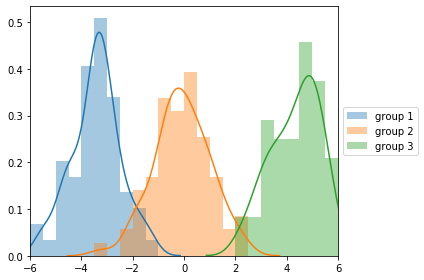

In [81]:
# stacked histogram of 1st discriminant
ldahist(lda_values["x"].LD1, y)

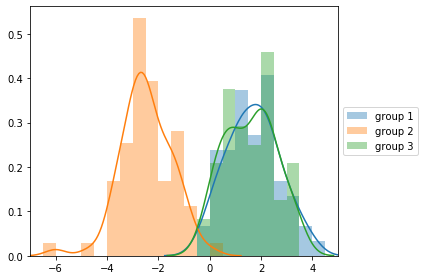

In [82]:
# stacked histogram of 2nd discriminant
ldahist(lda_values["x"].LD2, y)

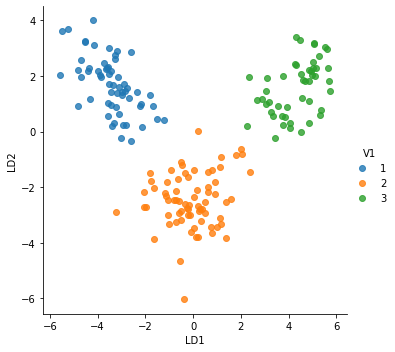

In [83]:
# scatter plot of best two discriminant functions
sns.lmplot("LD1", "LD2", lda_values["x"].join(y), hue="V1", fit_reg=False)